##  1. Scraping Bangalore City Wards Table from Wikipedia

In [1]:

!pip install lxml
!pip install html5lib
!pip install beautifulsoup4
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
import requests 
from pandas.io.json import json_normalize
print('Libraries imported.')


%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0



Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py36_0         147 KB  conda-forge
    ca-certificates-2019.9.11  |       hecc5488_0         144 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [2]:
!wget -q -O 'Bangalore_Data.html' https://en.wikipedia.org/wiki/List_of_wards_in_Bangalore
!wget -q -O 'Ward_Data.html' https://indikosh.com/ward/656137/bbmp-ward-no-0001
print('Data downloaded!')

Data downloaded!


In [3]:
from bs4 import BeautifulSoup
import requests
with open('Bangalore_Data.html') as html_file:
    soup = BeautifulSoup(html_file,'lxml')
    #print(soup.prettify())
    
with open('Ward_Data.html') as html_file:
    soup1 = BeautifulSoup(html_file,'lxml')
    #print(soup.prettify())

In [4]:
table = soup.find('table',class_='wikitable')
ward_table = soup1.find('table',class_='table sortable')

In [5]:
    data = []
    ward_data = []
    
for th in table.tbody.tr.find_all('th'):
            column_name = th.text
            data.append(column_name)
            
for th in ward_table.thead.tr.find_all('th'):
            column_name = th.text
            ward_data.append(column_name)

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
Bangalore_ward = pd.DataFrame(columns=data)
Wards_Details = pd.DataFrame(columns=ward_data)

In [7]:
data1 = []
data2 = []

for td in table.find_all('td'):
            column_values = td.text
            data1.append(column_values)
            
            
for td in ward_table.find_all('td'):
            column_values = td.text
            data2.append(column_values)

In [8]:
length = len(data1) 
print(length)
length_ward = len(data2) 
print(length)
Ward_Num1 = []
Ward_Num2 = []
Population1 = []
Ward_Name1 = []
District1 = []
Zone1 = []


990
990


In [9]:
for i in range(0,length,5): 
    Ward_Num1.append(data1[i])
    
for i in range(1,length,5): 
     Ward_Name1.append(data1[i])
        
for i in range(3,length,5): 
     District1.append(data1[i])
        
for i in range(4,length,5): 
     Zone1.append(data1[i])
    

In [10]:
Ward_Num = Ward_Num1
Ward_Name = Ward_Name1
District = District1
Zone = Zone1
Ward_Num[:] = [s.replace('\n', '') for s in Ward_Num]
Ward_Name[:] = [s.replace('\n', '') for s in Ward_Name]
District[:] = [s.replace('\n', '') for s in District]
Zone[:] = [s.replace('\n', '') for s in Zone]

Bangalore_df = pd.DataFrame(list(zip(Ward_Num, Ward_Name, District, Zone)), 
               columns =['Ward_Num', 'Ward_Name','District', 'Zone']) 

In [11]:
Bangalore_df.head()

,Ward_Num,Ward_Name,District,Zone
0,1,Kempegowda,Yelahanka,Chikballapur
1,2,Chowdeshwari,Yelahanka,Chikballapur
2,3,Attur,Yelahanka,Chikballapur
3,4,Yelahanka Satellite Town,Yelahanka,Chikballapur
4,5,Jakkur,Byatarayanapura,Bangalore North


In [12]:
# Data Conditioning
Bangalore_df['Ward_Num'] = Bangalore_df.Ward_Num.astype(int)
Bangalore_df.sort_values('Ward_Num', inplace=True, ascending=True)
Bangalore_df

,Ward_Num,Ward_Name,District,Zone
0,1,Kempegowda,Yelahanka,Chikballapur
1,2,Chowdeshwari,Yelahanka,Chikballapur
2,3,Attur,Yelahanka,Chikballapur
3,4,Yelahanka Satellite Town,Yelahanka,Chikballapur
4,5,Jakkur,Byatarayanapura,Bangalore North
5,6,Thanisandra,Byatarayanapura,Bangalore North
6,7,Byatarayanapura,Byatarayanapura,Bangalore North
7,8,Kodigehalli,Byatarayanapura,Bangalore North
8,9,Vidyaranyapura,Byatarayanapura,Bangalore North
9,10,Doddabommasandra,Byatarayanapura,Bangalore North


In [13]:
for i in range(0,length_ward,2): 
     Ward_Num2.append(data2[i])

for i in range(1,length_ward,2): 
     Population1.append(data2[i])

In [14]:
Population = Population1
Ward_Num = Ward_Num2

Ward_Num[:] = [s.replace('\n', '') for s in Ward_Num]
Population[:] = [s.replace('\n', '') for s in Population]
Ward_Num[:] = [s.replace('Bbmp Ward No', '') for s in Ward_Num]

Ward_df = pd.DataFrame(list(zip(Ward_Num, Population)), 
               columns =['Ward_Num', 'Population']) 


Ward_df['Ward_Num'] = Ward_df.Ward_Num.astype(int)
#Ward_df.sort_values('Ward_Num', inplace=True, ascending=True)
#Ward_df.reset_index(inplace=True)
Ward_df

,Ward_Num,Population
0,25,"95,368"
1,150,"80,180"
2,192,"80,037"
3,40,"72,794"
4,7,"72,154"
5,6,"71,855"
6,191,"71,004"
7,73,"68,922"
8,189,"68,554"
9,129,"68,132"


#### I first used of List of Wards of Bangalore page from Wiki to scrap the table to create a data-frame. For this, I’ve used requests and Beautifulsoup4 library to create a data-frame containing name of the 198 wards of Bangalore, Area, population and Major District

In [15]:
df_Bangalore_wards = pd.merge(Bangalore_df, Ward_df, on='Ward_Num' ,how='left' )
df_Bangalore_wards

,Ward_Num,Ward_Name,District,Zone,Population
0,1,Kempegowda,Yelahanka,Chikballapur,"34,783"
1,2,Chowdeshwari,Yelahanka,Chikballapur,"36,602"
2,3,Attur,Yelahanka,Chikballapur,"58,129"
3,4,Yelahanka Satellite Town,Yelahanka,Chikballapur,"41,986"
4,5,Jakkur,Byatarayanapura,Bangalore North,"52,025"
5,6,Thanisandra,Byatarayanapura,Bangalore North,"71,855"
6,7,Byatarayanapura,Byatarayanapura,Bangalore North,"72,154"
7,8,Kodigehalli,Byatarayanapura,Bangalore North,"47,546"
8,9,Vidyaranyapura,Byatarayanapura,Bangalore North,"57,195"
9,10,Doddabommasandra,Byatarayanapura,Bangalore North,"36,396"


 ### We are concentrating on below 10 areas which are fastest Growing Area In Bangalore and have major IT technology Parks.
  Places :- 'Hebbal','J.P.Nagar','Rajarajeshwari Nagar','Jayangar','Domlur','Bellandur','BTM Layout','Koramangala','Kadugudi','Hoysala Nagar'

In [16]:
list_of_values = ['Hebbal','J.P.Nagar','Rajarajeshwari Nagar','Jayangar','Domlur','BTM Layout','Koramangala','Kadugudi','Hoysala Nagar','Bellandur']
print(list_of_values)

['Hebbal', 'J.P.Nagar', 'Rajarajeshwari Nagar', 'Jayangar', 'Domlur', 'BTM Layout', 'Koramangala', 'Kadugudi', 'Hoysala Nagar', 'Bellandur']


In [17]:
#y = df[df['A'] in list_of_values]
Bangalore_City = df_Bangalore_wards[df_Bangalore_wards['Ward_Name'].isin(list_of_values)]
#Bangalore_City = df_Bangalore_wards.loc[df_Bangalore_wards['Ward_Name'] == 'Hebbal']
Bangalore_City["Ward_Name"].replace(["Hoysala Nagar"], "IndraNagar", inplace=True)
Bangalore_City["Ward_Name"].replace(["Kadugudi"], "Kadugodi", inplace=True)
Bangalore_City["Ward_Name"].replace(["J.P.Nagar"], "J P Nagar", inplace=True)
Bangalore_City["Ward_Name"].replace(["Jayangar"], "Jayanagar", inplace=True)
Bangalore_City["District"].replace(["B.T.M Layout"], "BTM Layout", inplace=True)

Bangalore_City = Bangalore_City.reset_index(drop=True)
Bangalore_City

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,Ward_Num,Ward_Name,District,Zone,Population
0,21,Hebbal,Hebbal,Bangalore North,"32,516"
1,80,IndraNagar,CV Raman Nagar,Bangalore Central,"35,228"
2,83,Kadugodi,Mahadevapura,Bangalore Central,"43,942"
3,112,Domlur,Shanthinagar,Bangalore Central,"30,638"
4,150,Bellandur,Mahadevapura,Bangalore Central,"80,180"
5,151,Koramangala,BTM Layout,Bangalore South,"38,316"
6,153,Jayanagar,Chikpet,Bangalore South,"38,151"
7,160,Rajarajeshwari Nagar,Rajarajeshwarinagar,Bangalore Rural,"56,897"
8,176,BTM Layout,BTM Layout,Bangalore South,"52,250"
9,177,J P Nagar,Jayanagar,Bangalore South,"28,846"


## 2.  Getting Coordinates of Major Bangalore Wards : Geopy Client

### Get the coordinates of these 10 major districts using geocoder class of Geopy client

In [18]:
Latitude = []
Longitude = []
City_Name = []
City_Name = Bangalore_City['Ward_Name']
length1 = len(City_Name)

for i in range(0,length1,1): 
    address = City_Name[i]
    geolocator = Nominatim(user_agent="bang_explorer")
    location = geolocator.geocode(City_Name[i])
    latitude = location.latitude
    longitude = location.longitude
    Latitude.append(latitude)
    Longitude.append(longitude)

In [19]:
Bangalore_City['Latitude'] = Latitude
Bangalore_City['Longitude'] = Longitude
Bangalore_City

,Ward_Num,Ward_Name,District,Zone,Population,Latitude,Longitude
0,21,Hebbal,Hebbal,Bangalore North,"32,516",13.038218,77.591900
1,80,IndraNagar,CV Raman Nagar,Bangalore Central,"35,228",17.082241,77.998531
2,83,Kadugodi,Mahadevapura,Bangalore Central,"43,942",12.998577,77.760972
3,112,Domlur,Shanthinagar,Bangalore Central,"30,638",12.962467,77.638196
4,150,Bellandur,Mahadevapura,Bangalore Central,"80,180",12.936121,77.666617
5,151,Koramangala,BTM Layout,Bangalore South,"38,316",13.292399,77.751926
6,153,Jayanagar,Chikpet,Bangalore South,"38,151",27.643927,83.052805
7,160,Rajarajeshwari Nagar,Rajarajeshwarinagar,Bangalore Rural,"56,897",12.927428,77.515372
8,176,BTM Layout,BTM Layout,Bangalore South,"52,250",12.915177,77.610282
9,177,J P Nagar,Jayanagar,Bangalore South,"28,846",12.909492,77.596739


In [20]:
##Correcting the coordinates of IndraNagr , JayaNagar and kormangala
import numpy as np
arr_j = np.array([12.9308,77.5802])
arr_i = np.array([12.9784,77.6408])
arr_k = np.array([12.9352,77.6244])

Bangalore_City['Latitude'][6] = arr_j[0]
Bangalore_City['Longitude'][6] = arr_j[1]
Bangalore_City['Latitude'][1] = arr_i[0]
Bangalore_City['Longitude'][1] = arr_i[1]
Bangalore_City['Latitude'][5] = arr_k[0]
Bangalore_City['Longitude'][5] = arr_k[1]
Bangalore_City

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to

,Ward_Num,Ward_Name,District,Zone,Population,Latitude,Longitude
0,21,Hebbal,Hebbal,Bangalore North,"32,516",13.038218,77.591900
1,80,IndraNagar,CV Raman Nagar,Bangalore Central,"35,228",12.978400,77.640800
2,83,Kadugodi,Mahadevapura,Bangalore Central,"43,942",12.998577,77.760972
3,112,Domlur,Shanthinagar,Bangalore Central,"30,638",12.962467,77.638196
4,150,Bellandur,Mahadevapura,Bangalore Central,"80,180",12.936121,77.666617
5,151,Koramangala,BTM Layout,Bangalore South,"38,316",12.935200,77.624400
6,153,Jayanagar,Chikpet,Bangalore South,"38,151",12.930800,77.580200
7,160,Rajarajeshwari Nagar,Rajarajeshwarinagar,Bangalore Rural,"56,897",12.927428,77.515372
8,176,BTM Layout,BTM Layout,Bangalore South,"52,250",12.915177,77.610282
9,177,J P Nagar,Jayanagar,Bangalore South,"28,846",12.909492,77.596739


In [21]:
Bangalore_City["Ward_Name"].replace(["Bellandur"], "Marathalli", inplace=True)
Bangalore_City["Ward_Name"].replace(["Kadugodi"], "WhiteField", inplace=True)
arr_m = np.array([12.9569,77.7011])
arr_w = np.array([12.9698,77.7500])
arr_Co = np.array([84,86])

Bangalore_City['Latitude'][2] = arr_w[0]
Bangalore_City['Longitude'][2] = arr_w[1]
Bangalore_City['Latitude'][4] = arr_m[0]
Bangalore_City['Longitude'][4] = arr_m[1]
Bangalore_City['Ward_Num'][2] = arr_Co[0]
Bangalore_City['Ward_Num'][4] = arr_Co[1]

## land market value area in Bangalore Wards

area_Sqft = [14485,17735,20702,11165,12402,15002,14589,5318,10390,6025]
Bangalore_City['Area_SqFt_RS'] = area_Sqft

Bangalore_City

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to

,Ward_Num,Ward_Name,District,Zone,Population,Latitude,Longitude,Area_SqFt_RS
0,21,Hebbal,Hebbal,Bangalore North,"32,516",13.038218,77.591900,14485
1,80,IndraNagar,CV Raman Nagar,Bangalore Central,"35,228",12.978400,77.640800,17735
2,84,WhiteField,Mahadevapura,Bangalore Central,"43,942",12.969800,77.750000,20702
3,112,Domlur,Shanthinagar,Bangalore Central,"30,638",12.962467,77.638196,11165
4,86,Marathalli,Mahadevapura,Bangalore Central,"80,180",12.956900,77.701100,12402
5,151,Koramangala,BTM Layout,Bangalore South,"38,316",12.935200,77.624400,15002
6,153,Jayanagar,Chikpet,Bangalore South,"38,151",12.930800,77.580200,14589
7,160,Rajarajeshwari Nagar,Rajarajeshwarinagar,Bangalore Rural,"56,897",12.927428,77.515372,5318
8,176,BTM Layout,BTM Layout,Bangalore South,"52,250",12.915177,77.610282,10390
9,177,J P Nagar,Jayanagar,Bangalore South,"28,846",12.909492,77.596739,6025


####  Above Dataframe shows the average land Price in Major cities/wards of Bangalore.

In [22]:
address = 'Bangalore'
geolocator = Nominatim(user_agent="bang_explorer")
location = geolocator.geocode(address)
latitude1 = location.latitude
longitude1 = location.longitude
print('The geograpical coordinate of Bangalore City are {}, {}.'.format(latitude1, longitude1))

The geograpical coordinate of Bangalore City are 12.9791198, 77.5912997.


In [23]:
map_bangalore = folium.Map(location=[latitude1, longitude1], zoom_start=11, )

# add markers to map
for lat, lng, label in zip(Bangalore_City['Latitude'], Bangalore_City['Longitude'], Bangalore_City['Ward_Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangalore)  
    
# add pop-up text to each marker on the map
latitudes = list(Bangalore_City['Latitude'])
longitudes = list(Bangalore_City['Longitude'])
labels = list(Bangalore_City['Ward_Name'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_bangalore)    
    

map_bangalore

###                                                          Above map Represents the 10 Major wards in Bangalore Map Coordinates

## 3. Web Scraping using Foursquare Location Data

In [24]:
CLIENT_ID = 'MTHT3ZUA4FMUAB4KN5KSCQEJEFENE5UGOBVFZ52FXWHHUS1C' # your Foursquare ID
CLIENT_SECRET = 'GRKZYWARSKW05FUDQFCYIJSAZTTDQNGAXTN1IV1KOSEPAQPE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MTHT3ZUA4FMUAB4KN5KSCQEJEFENE5UGOBVFZ52FXWHHUS1C
CLIENT_SECRET:GRKZYWARSKW05FUDQFCYIJSAZTTDQNGAXTN1IV1KOSEPAQPE


#### Function to get venues for all the citites in Bangalore 

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    LIMIT = 100
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Ward_Name', 
                  'Ward Latitude', 
                  'Ward Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [26]:
Bangalore_Venue = getNearbyVenues(names=Bangalore_City['Ward_Name'],
                                   latitudes=Bangalore_City['Latitude'],
                                   longitudes=Bangalore_City['Longitude']
                                  )

Bangalore_Venue

Hebbal
IndraNagar
WhiteField
Domlur
Marathalli
Koramangala
Jayanagar
Rajarajeshwari Nagar
BTM Layout
J P Nagar


,Ward_Name,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hebbal,13.038218,77.591900,Moto Store & Café,13.032086,77.590020,Motorcycle Shop
1,Hebbal,13.038218,77.591900,Saaga - The Royal Senate Hotel,13.036498,77.589525,Indian Restaurant
2,Hebbal,13.038218,77.591900,Domino's Pizza,13.035000,77.597000,Pizza Place
3,Hebbal,13.038218,77.591900,Hebbal Lake,13.042987,77.591008,Lake
4,Hebbal,13.038218,77.591900,Hebbal Bus Terminus,13.040231,77.589654,Bus Station
5,Hebbal,13.038218,77.591900,United Colors of Benetton,13.034467,77.593542,Clothing Store
6,Hebbal,13.038218,77.591900,Hebbal Outer Ring Road Bus Stop,13.042727,77.591406,Bus Station
7,Hebbal,13.038218,77.591900,Royal Senate,13.042986,77.590516,Indian Restaurant
8,Hebbal,13.038218,77.591900,kabab studio - coraltree,13.034889,77.597477,Indian Restaurant
9,Hebbal,13.038218,77.591900,Hindustan mess,13.034869,77.597626,Indian Restaurant


In [27]:
print('There are {} uniques categories.'.format(len(Bangalore_Venue['Venue Category'].unique())))
print('Uniques categories are {}'.format(Bangalore_Venue['Venue Category'].unique()))

There are 117 uniques categories.
Uniques categories are ['Motorcycle Shop' 'Indian Restaurant' 'Pizza Place' 'Lake' 'Bus Station'
 'Clothing Store' 'Coffee Shop' 'Grocery Store' 'Brewery' 'Boutique'
 'Karnataka Restaurant' 'Bakery' 'German Restaurant' 'Cocktail Bar' 'Café'
 'Gym / Fitness Center' 'Breakfast Spot' 'Ice Cream Shop' 'Dessert Shop'
 'Mexican Restaurant' 'Pub' 'Outlet Store' 'Bengali Restaurant'
 'Chinese Restaurant' 'Lounge' 'Andhra Restaurant' 'Bar' 'Butcher'
 'Middle Eastern Restaurant' 'Gastropub' 'Udupi Restaurant' 'Bookstore'
 'Punjabi Restaurant' 'Chocolate Shop' 'Arcade' 'Asian Restaurant'
 'Vietnamese Restaurant' 'Music Venue' 'Cupcake Shop' 'Italian Restaurant'
 'Restaurant' 'Caribbean Restaurant' 'Steakhouse' 'Candy Store' 'Tea Room'
 'Gourmet Shop' 'Department Store' 'Athletics & Sports' 'Deli / Bodega'
 'Turkish Restaurant' 'Flea Market' 'Soccer Field' 'Light Rail Station'
 'Eastern European Restaurant' 'Hotel' 'Hotel Bar' 'Kerala Restaurant'
 'Swiss Restauran

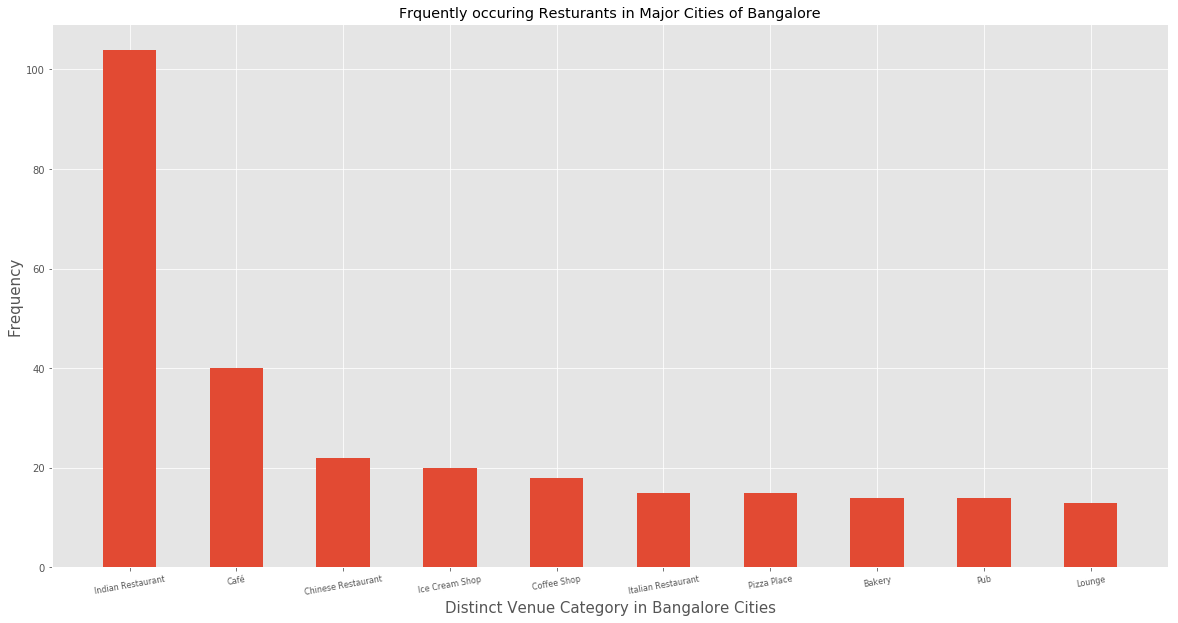

In [28]:
Bangalore_Venue_freq = Bangalore_Venue.groupby('Venue Category').count().reset_index()
Bangalore_Venue_freq1 = Bangalore_Venue_freq.drop(['Ward Latitude', 'Ward Longitude','Venue','Venue Latitude','Venue Longitude'], axis=1)
Bangalore_Venue_freq_sort = Bangalore_Venue_freq1.rename(columns = {"Ward_Name": "Frequency"}).sort_values(by='Frequency', ascending=False).head(10)


df_Restu_City = Bangalore_Venue_freq_sort['Venue Category'].values.tolist()
df_Restu_freq = Bangalore_Venue_freq_sort['Frequency'].values.tolist()

fig = plt.figure(figsize=(20,10))
bar_width = 0.50

index = np.arange(len(df_Restu_City))
plt.bar(index, df_Restu_freq, bar_width)
plt.xlabel('Distinct Venue Category in Bangalore Cities',fontsize=15) # add to x-label to the plot
plt.ylabel('Frequency',fontsize=15) # add y-label to the plot
plt.xticks(index, df_Restu_City, fontsize=8, rotation=10  )
plt.title('Frquently occuring Resturants in Major Cities of Bangalore') # add title to the plot
plt.show()

### From below  displayed data we observed that Resturant are the major Venue mostly visited among all the other venues.

In [29]:
# one hot encoding
Bangalore_onehot1 = pd.get_dummies(Bangalore_Venue[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bangalore_onehot1['Ward_Name'] = Bangalore_Venue['Ward_Name'] 

# move neighborhood column to the first column
fixed_columns1 = [Bangalore_onehot1.columns[-1]] + list(Bangalore_onehot1.columns[:-1])
Bangalore_onehot1 = Bangalore_onehot1[fixed_columns1]


Bangalore_grouped1 = Bangalore_onehot1.groupby('Ward_Name').mean().reset_index()

num_top_venues1 = 5

for hood in Bangalore_grouped1['Ward_Name']:
    print("----"+hood+"----")
    temp = Bangalore_grouped1[Bangalore_grouped1['Ward_Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues1))
    print('\n')

----BTM Layout----
                           venue  freq
0              Indian Restaurant  0.18
1                 Ice Cream Shop  0.08
2                         Bakery  0.08
3  Vegetarian / Vegan Restaurant  0.06
4                    Snack Place  0.06


----Domlur----
                venue  freq
0   Indian Restaurant  0.15
1                Café  0.06
2                 Pub  0.06
3               Hotel  0.05
4  Italian Restaurant  0.05


----Hebbal----
               venue  freq
0  Indian Restaurant  0.31
1        Bus Station  0.15
2     Clothing Store  0.15
3        Pizza Place  0.08
4               Lake  0.08


----IndraNagar----
               venue  freq
0  Indian Restaurant  0.14
1               Café  0.07
2                Pub  0.06
3             Lounge  0.04
4                Bar  0.04


----J P Nagar----
               venue  freq
0  Indian Restaurant  0.21
1          Multiplex  0.08
2        Coffee Shop  0.08
3  Andhra Restaurant  0.04
4            Brewery  0.04


----Jayanagar---

# Lets Consider only Resturants in all the major wards In Bangalore 

In [30]:
Bangalore_Venue_Resturant = Bangalore_Venue[Bangalore_Venue['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Bangalore_Venue_Resturant.index = np.arange(1,len(Bangalore_Venue_Resturant)+1)
Bangalore_Venue_Resturant.head()

,Ward_Name,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Hebbal,13.038218,77.5919,Saaga - The Royal Senate Hotel,13.036498,77.589525,Indian Restaurant
2,Hebbal,13.038218,77.5919,Royal Senate,13.042986,77.590516,Indian Restaurant
3,Hebbal,13.038218,77.5919,kabab studio - coraltree,13.034889,77.597477,Indian Restaurant
4,Hebbal,13.038218,77.5919,Hindustan mess,13.034869,77.597626,Indian Restaurant
5,IndraNagar,12.978400,77.6408,Coorg - The Restaurant,12.978958,77.641735,Karnataka Restaurant


# Showing in map the Distinct Restaurants in the Bangalore Major Cities

In [31]:
map_restaurants = folium.Map(location=[latitude1, longitude1], zoom_start=11)

#set color scheme for the Venues based on the Major Districts
Cities = Bangalore_Venue_Resturant['Ward_Name'].values.tolist()
# Python code to remove duplicate elements 
def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
        if num not in final_list: 
            final_list.append(num) 
    return final_list 
      
# Driver Code 
Cities = Remove(Cities)

x = np.arange(len(Cities))

rainbow = ['#FF0000','#FFFF00','#EE82EE','#87CEEB','#2E8B57','#FFC0CB','#800080','#708090','#4682B4','#FAA460']

for lat, lan, poi, distr in zip(Bangalore_Venue_Resturant['Venue Latitude'],
                                          Bangalore_Venue_Resturant['Venue Longitude'],
                                          Bangalore_Venue_Resturant['Venue Category'],
                                          Bangalore_Venue_Resturant['Ward_Name']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
         [lat,lan],
         radius=7,
         popup=label,
         color=rainbow[Cities.index(distr)-1],
         fill=True,
         fill_color=rainbow[Cities.index(distr)-1],
         fill_opacity=0.3).add_to(map_restaurants)
    
map_restaurants

####  Yellow :- Represent the resturant in Whitefeild,Light Blue :- Represent the resturant in Marathalli,Green :- Represent the resturant in Kormangala,Violet :- Represent the resturant in RR Nagar,Grey :- Represent the resturant in BTM Layout,Dark Blue :- Represent the resturant in JP Nagar,Pink :- Represent the resturant in JayaNagar,Orange :- Represent the resturant in Hebbal,Red :- Represent the resturant in Indra Nagar,Magenta :- Represent the resturant in Domlur

In [32]:
Bangalore_Venue_Resturant_grp = Bangalore_Venue_Resturant.groupby('Ward_Name').count().reset_index()
Bangalore_Venue_Resturant_grp

,Ward_Name,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,BTM Layout,21,21,21,21,21,21
1,Domlur,35,35,35,35,35,35
2,Hebbal,4,4,4,4,4,4
3,IndraNagar,33,33,33,33,33,33
4,J P Nagar,10,10,10,10,10,10
5,Jayanagar,44,44,44,44,44,44
6,Koramangala,32,32,32,32,32,32
7,Marathalli,26,26,26,26,26,26
8,Rajarajeshwari Nagar,2,2,2,2,2,2
9,WhiteField,7,7,7,7,7,7


#### Unique Restaurant categories

In [33]:
print('There are {} uniques categories.'.format(len(Bangalore_Venue_Resturant['Venue Category'].unique())))
print('Uniques categories are {}'.format(Bangalore_Venue_Resturant['Venue Category'].unique()))

There are 30 uniques categories.
Uniques categories are ['Indian Restaurant' 'Karnataka Restaurant' 'German Restaurant'
 'Mexican Restaurant' 'Bengali Restaurant' 'Chinese Restaurant'
 'Andhra Restaurant' 'Middle Eastern Restaurant' 'Udupi Restaurant'
 'Punjabi Restaurant' 'Asian Restaurant' 'Vietnamese Restaurant'
 'Italian Restaurant' 'Restaurant' 'Caribbean Restaurant'
 'Turkish Restaurant' 'Eastern European Restaurant' 'Kerala Restaurant'
 'Swiss Restaurant' 'Fast Food Restaurant' 'Rajasthani Restaurant'
 'Tex-Mex Restaurant' 'Vegetarian / Vegan Restaurant'
 'Hyderabadi Restaurant' 'Thai Restaurant' 'Seafood Restaurant'
 'South Indian Restaurant' 'Indian Chinese Restaurant'
 'Dim Sum Restaurant' 'Mediterranean Restaurant']


### There are 30  unique venue categories and Indian Restaurants top the charts as we can see in the plot below —

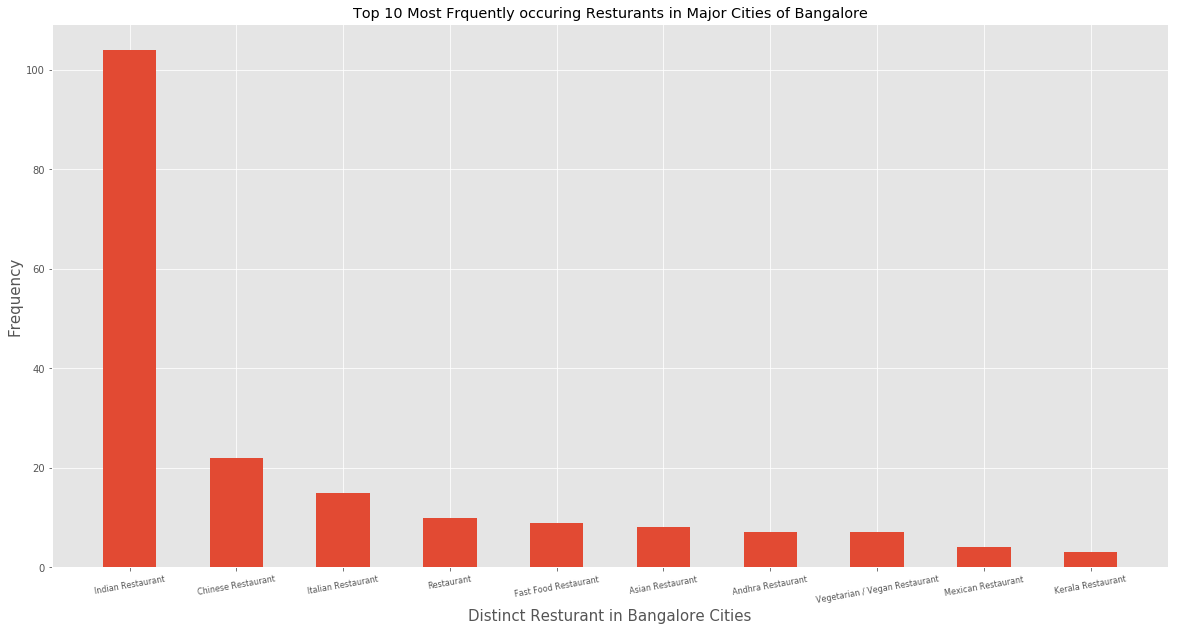

In [34]:
Bangalore_Venue_Resturant_freq = Bangalore_Venue_Resturant.groupby('Venue Category').count().reset_index()
Bangalore_Venue_Resturant_freq1 = Bangalore_Venue_Resturant_freq.drop(['Ward Latitude', 'Ward Longitude','Venue','Venue Latitude','Venue Longitude'], axis=1)
Bangalore_Venue_Resturant_freq_sort = Bangalore_Venue_Resturant_freq1.rename(columns = {"Ward_Name": "Frequency"}).sort_values(by='Frequency', ascending=False).head(10)


df_Restu_City = Bangalore_Venue_Resturant_freq_sort['Venue Category'].values.tolist()
df_Restu_freq = Bangalore_Venue_Resturant_freq_sort['Frequency'].values.tolist()

fig = plt.figure(figsize=(20,10))
bar_width = 0.50

index = np.arange(len(df_Restu_City))
plt.bar(index, df_Restu_freq, bar_width)
plt.xlabel('Distinct Resturant in Bangalore Cities',fontsize=15) # add to x-label to the plot
plt.ylabel('Frequency',fontsize=15) # add y-label to the plot
plt.xticks(index, df_Restu_City, fontsize=8, rotation=10  )
plt.title('Top 10 Most Frquently occuring Resturants in Major Cities of Bangalore') # add title to the plot
plt.show()

In [35]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://savorjapan.com/gg/content_image/tokyo-indian_hero.jpg")

#####  Indian  Restaurants are the most frequently visited places around major cities of Bangalore. Yum!

## 4. Visualization and Data Exploration

In [36]:
# one hot encoding
Bangalore_onehot = pd.get_dummies(Bangalore_Venue_Resturant[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Bangalore_onehot['Ward_Name'] = Bangalore_Venue_Resturant['Ward_Name'] 

# move neighborhood column to the first column
fixed_columns = [Bangalore_onehot.columns[-1]] + list(Bangalore_onehot.columns[:-1])
Bangalore_onehot = Bangalore_onehot[fixed_columns]

Bangalore_onehot.head()

,Ward_Name,Andhra Restaurant,Asian Restaurant,Bengali Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Fast Food Restaurant,German Restaurant,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Karnataka Restaurant,Kerala Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Swiss Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Hebbal,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Hebbal,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Hebbal,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hebbal,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,IndraNagar,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Group rows by wards and  take the mean of the frequency of occurrence of each category

In [37]:
Bangalore_grouped = Bangalore_onehot.groupby('Ward_Name').mean().reset_index()
Bangalore_grouped

,Ward_Name,Andhra Restaurant,Asian Restaurant,Bengali Restaurant,Caribbean Restaurant,Chinese Restaurant,Dim Sum Restaurant,Eastern European Restaurant,Fast Food Restaurant,German Restaurant,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Italian Restaurant,Karnataka Restaurant,Kerala Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Seafood Restaurant,South Indian Restaurant,Swiss Restaurant,Tex-Mex Restaurant,Thai Restaurant,Turkish Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,BTM Layout,0.000000,0.095238,0.000000,0.000000,0.095238,0.047619,0.000000,0.095238,0.000000,0.000000,0.0,0.428571,0.047619,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.047619,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.142857,0.000000
1,Domlur,0.000000,0.057143,0.000000,0.000000,0.057143,0.000000,0.000000,0.028571,0.000000,0.000000,0.0,0.428571,0.142857,0.028571,0.000000,0.0,0.028571,0.028571,0.000000,0.028571,0.085714,0.00000,0.00000,0.000000,0.028571,0.00000,0.000000,0.000000,0.000000,0.057143
2,Hebbal,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,IndraNagar,0.060606,0.030303,0.030303,0.030303,0.121212,0.000000,0.000000,0.000000,0.030303,0.000000,0.0,0.393939,0.030303,0.030303,0.000000,0.0,0.030303,0.030303,0.030303,0.000000,0.060606,0.00000,0.00000,0.000000,0.000000,0.00000,0.030303,0.030303,0.000000,0.030303
4,J P Nagar,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.500000,0.100000,0.000000,0.000000,0.1,0.000000,0.000000,0.000000,0.100000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,Jayanagar,0.022727,0.022727,0.000000,0.000000,0.159091,0.000000,0.000000,0.068182,0.000000,0.000000,0.0,0.590909,0.068182,0.000000,0.000000,0.0,0.022727,0.000000,0.000000,0.000000,0.045455,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,Koramangala,0.031250,0.031250,0.000000,0.000000,0.125000,0.000000,0.000000,0.031250,0.000000,0.000000,0.0,0.468750,0.125000,0.000000,0.031250,0.0,0.031250,0.000000,0.000000,0.000000,0.000000,0.03125,0.03125,0.000000,0.000000,0.03125,0.000000,0.000000,0.031250,0.000000
7,Marathalli,0.076923,0.038462,0.000000,0.000000,0.076923,0.000000,0.000000,0.000000,0.000000,0.038462,0.0,0.576923,0.000000,0.000000,0.038462,0.0,0.000000,0.000000,0.000000,0.000000,0.038462,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.115385,0.000000
8,Rajarajeshwari Nagar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,WhiteField,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.0,0.285714,0.000000,0.000000,0.142857,0.0,0.000000,0.000000,0.000000,0.000000,0.142857,0.00000,0.00000,0.142857,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


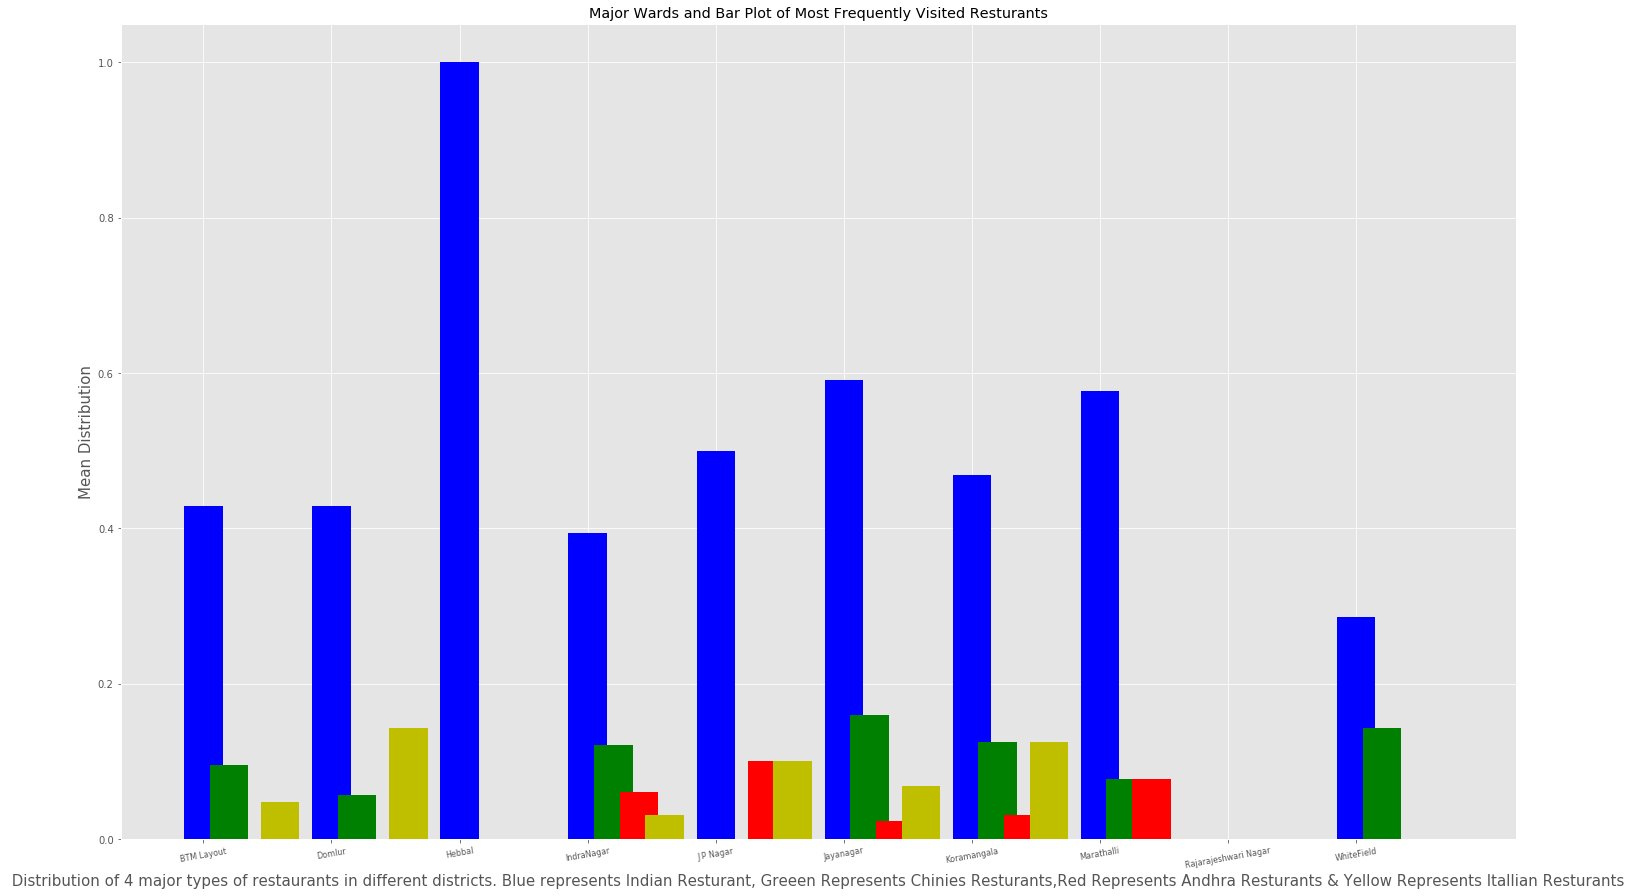

In [38]:
df_Restu_City = Bangalore_grouped['Ward_Name'].values.tolist()
df_Restu_mean = Bangalore_grouped['Indian Restaurant'].values.tolist()
df_Restu_mean1 = Bangalore_grouped['Chinese Restaurant'].values.tolist()
df_Restu_mean2 = Bangalore_grouped['Andhra Restaurant'].values.tolist()
df_Restu_mean3 = Bangalore_grouped['Italian Restaurant'].values.tolist()

fig = plt.figure(figsize=(25,15))
bar_width = 0.30

index = np.arange(len(df_Restu_City))
plt.bar(index + 0.00, df_Restu_mean, bar_width, color = 'b')
plt.bar(index + 0.20, df_Restu_mean1, bar_width, color = 'g')
plt.bar(index + 0.40, df_Restu_mean2, bar_width, color = 'r')
plt.bar(index + 0.60, df_Restu_mean3, bar_width, color = 'y')
plt.xlabel(' Distribution of 4 major types of restaurants in different districts. Blue represents Indian Resturant, Greeen Represents Chinies Resturants,Red Represents Andhra Resturants & Yellow Represents Itallian Resturants ',fontsize=15) 
plt.ylabel('Mean Distribution',fontsize=15) # add y-label to the plot
plt.xticks(index, df_Restu_City, fontsize=8, rotation=10  )
plt.title('Major Wards and Bar Plot of Most Frequently Visited Resturants') # add title to the plot
plt.show()

#### Let's print each ward along with the top 5 most commonly Visited venues

In [39]:
num_top_venues = 5

for hood in Bangalore_grouped['Ward_Name']:
    print("----"+hood+"----")
    temp = Bangalore_grouped[Bangalore_grouped['Ward_Name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BTM Layout----
                           venue  freq
0              Indian Restaurant  0.43
1  Vegetarian / Vegan Restaurant  0.14
2             Chinese Restaurant  0.10
3               Asian Restaurant  0.10
4           Fast Food Restaurant  0.10


----Domlur----
                   venue  freq
0      Indian Restaurant  0.43
1     Italian Restaurant  0.14
2             Restaurant  0.09
3       Asian Restaurant  0.06
4  Vietnamese Restaurant  0.06


----Hebbal----
                           venue  freq
0              Indian Restaurant   1.0
1              Andhra Restaurant   0.0
2             Mexican Restaurant   0.0
3  Vegetarian / Vegan Restaurant   0.0
4               Udupi Restaurant   0.0


----IndraNagar----
                venue  freq
0   Indian Restaurant  0.39
1  Chinese Restaurant  0.12
2   Andhra Restaurant  0.06
3          Restaurant  0.06
4  Italian Restaurant  0.03


----J P Nagar----
                   venue  freq
0      Indian Restaurant   0.5
1      Andhra Restaura

#### Putting above into a *pandas* dataframe ,sort the venues in descending order.

In [40]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [41]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Ward_Name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Ward_venues_sorted = pd.DataFrame(columns=columns)
Ward_venues_sorted['Ward_Name'] = Bangalore_grouped['Ward_Name']

for ind in np.arange(Bangalore_grouped.shape[0]):
    Ward_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Bangalore_grouped.iloc[ind, :], num_top_venues)

Ward_venues_sorted

,Ward_Name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,BTM Layout,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
1,Domlur,Indian Restaurant,Italian Restaurant,Restaurant,Chinese Restaurant,Asian Restaurant
2,Hebbal,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Bengali Restaurant
3,IndraNagar,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
4,J P Nagar,Indian Restaurant,Andhra Restaurant,Fast Food Restaurant,Rajasthani Restaurant,Mediterranean Restaurant
5,Jayanagar,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Italian Restaurant,Restaurant
6,Koramangala,Indian Restaurant,Chinese Restaurant,Italian Restaurant,Kerala Restaurant,Mexican Restaurant
7,Marathalli,Indian Restaurant,Vegetarian / Vegan Restaurant,Andhra Restaurant,Chinese Restaurant,Restaurant
8,Rajarajeshwari Nagar,Fast Food Restaurant,Indian Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant
9,WhiteField,Indian Restaurant,Kerala Restaurant,Chinese Restaurant,Swiss Restaurant,Eastern European Restaurant


## 5. Cluster Wards

In [42]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 7

Bangalore_grouped_clustering = Bangalore_grouped.drop('Ward_Name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Bangalore_grouped_clustering)
kmeans.labels_

array([0, 3, 2, 3, 5, 6, 3, 6, 1, 4], dtype=int32)

In [43]:
# add clustering labels
Ward_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Bangalore_merged = Bangalore_Venue_Resturant

Bangalore_merged = Bangalore_merged.join(Ward_venues_sorted.set_index('Ward_Name'), on='Ward_Name')

Bangalore_merged

,Ward_Name,Ward Latitude,Ward Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Hebbal,13.038218,77.591900,Saaga - The Royal Senate Hotel,13.036498,77.589525,Indian Restaurant,2,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Bengali Restaurant
2,Hebbal,13.038218,77.591900,Royal Senate,13.042986,77.590516,Indian Restaurant,2,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Bengali Restaurant
3,Hebbal,13.038218,77.591900,kabab studio - coraltree,13.034889,77.597477,Indian Restaurant,2,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Bengali Restaurant
4,Hebbal,13.038218,77.591900,Hindustan mess,13.034869,77.597626,Indian Restaurant,2,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Bengali Restaurant
5,IndraNagar,12.978400,77.640800,Coorg - The Restaurant,12.978958,77.641735,Karnataka Restaurant,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
6,IndraNagar,12.978400,77.640800,Café Max,12.978408,77.644271,German Restaurant,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
7,IndraNagar,12.978400,77.640800,Chinita Real Mexican Food,12.980977,77.637205,Mexican Restaurant,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
8,IndraNagar,12.978400,77.640800,Esplanade Calcutta Cuisine,12.978779,77.636735,Bengali Restaurant,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
9,IndraNagar,12.978400,77.640800,Wanley,12.978988,77.642550,Chinese Restaurant,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
10,IndraNagar,12.978400,77.640800,Kund Restaurant,12.980014,77.640671,Indian Restaurant,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant


In [44]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Bangalore_merged['Venue Latitude'], Bangalore_merged['Venue Longitude'], Bangalore_merged['Ward_Name'], Bangalore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

 #### Major districts of Bangalore segmented into 7 clusters based on the most common venues.

## Examining Clusters

###  Cluster 0

In [45]:

Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 0, Bangalore_merged.columns[[0] + list(range(7, Bangalore_merged.shape[1]))]]

,Ward_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
184,BTM Layout,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
185,BTM Layout,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
186,BTM Layout,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
187,BTM Layout,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
188,BTM Layout,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
189,BTM Layout,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
190,BTM Layout,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
191,BTM Layout,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
192,BTM Layout,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant
193,BTM Layout,0,Indian Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Chinese Restaurant,Fast Food Restaurant


###  Cluster 1

In [46]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 1, Bangalore_merged.columns[[0] + list(range(7, Bangalore_merged.shape[1]))]]

,Ward_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
182,Rajarajeshwari Nagar,1,Fast Food Restaurant,Indian Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant
183,Rajarajeshwari Nagar,1,Fast Food Restaurant,Indian Chinese Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant


###  Cluster 2

In [47]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 2, Bangalore_merged.columns[[0] + list(range(7, Bangalore_merged.shape[1]))]]

,Ward_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Hebbal,2,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Bengali Restaurant
2,Hebbal,2,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Bengali Restaurant
3,Hebbal,2,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Bengali Restaurant
4,Hebbal,2,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Asian Restaurant,Bengali Restaurant


###  Cluster 3

In [48]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 3, Bangalore_merged.columns[[0] + list(range(7, Bangalore_merged.shape[1]))]]

,Ward_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
5,IndraNagar,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
6,IndraNagar,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
7,IndraNagar,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
8,IndraNagar,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
9,IndraNagar,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
10,IndraNagar,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
11,IndraNagar,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
12,IndraNagar,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
13,IndraNagar,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant
14,IndraNagar,3,Indian Restaurant,Chinese Restaurant,Andhra Restaurant,Restaurant,Middle Eastern Restaurant


###  Cluster 4

In [49]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 4, Bangalore_merged.columns[[0] + list(range(7, Bangalore_merged.shape[1]))]]

,Ward_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
38,WhiteField,4,Indian Restaurant,Kerala Restaurant,Chinese Restaurant,Swiss Restaurant,Eastern European Restaurant
39,WhiteField,4,Indian Restaurant,Kerala Restaurant,Chinese Restaurant,Swiss Restaurant,Eastern European Restaurant
40,WhiteField,4,Indian Restaurant,Kerala Restaurant,Chinese Restaurant,Swiss Restaurant,Eastern European Restaurant
41,WhiteField,4,Indian Restaurant,Kerala Restaurant,Chinese Restaurant,Swiss Restaurant,Eastern European Restaurant
42,WhiteField,4,Indian Restaurant,Kerala Restaurant,Chinese Restaurant,Swiss Restaurant,Eastern European Restaurant
43,WhiteField,4,Indian Restaurant,Kerala Restaurant,Chinese Restaurant,Swiss Restaurant,Eastern European Restaurant
44,WhiteField,4,Indian Restaurant,Kerala Restaurant,Chinese Restaurant,Swiss Restaurant,Eastern European Restaurant


###  Cluster 5

In [50]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 5, Bangalore_merged.columns[[0] + list(range(7, Bangalore_merged.shape[1]))]]

,Ward_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
205,J P Nagar,5,Indian Restaurant,Andhra Restaurant,Fast Food Restaurant,Rajasthani Restaurant,Mediterranean Restaurant
206,J P Nagar,5,Indian Restaurant,Andhra Restaurant,Fast Food Restaurant,Rajasthani Restaurant,Mediterranean Restaurant
207,J P Nagar,5,Indian Restaurant,Andhra Restaurant,Fast Food Restaurant,Rajasthani Restaurant,Mediterranean Restaurant
208,J P Nagar,5,Indian Restaurant,Andhra Restaurant,Fast Food Restaurant,Rajasthani Restaurant,Mediterranean Restaurant
209,J P Nagar,5,Indian Restaurant,Andhra Restaurant,Fast Food Restaurant,Rajasthani Restaurant,Mediterranean Restaurant
210,J P Nagar,5,Indian Restaurant,Andhra Restaurant,Fast Food Restaurant,Rajasthani Restaurant,Mediterranean Restaurant
211,J P Nagar,5,Indian Restaurant,Andhra Restaurant,Fast Food Restaurant,Rajasthani Restaurant,Mediterranean Restaurant
212,J P Nagar,5,Indian Restaurant,Andhra Restaurant,Fast Food Restaurant,Rajasthani Restaurant,Mediterranean Restaurant
213,J P Nagar,5,Indian Restaurant,Andhra Restaurant,Fast Food Restaurant,Rajasthani Restaurant,Mediterranean Restaurant
214,J P Nagar,5,Indian Restaurant,Andhra Restaurant,Fast Food Restaurant,Rajasthani Restaurant,Mediterranean Restaurant


###  Cluster 6

In [51]:
Bangalore_merged.loc[Bangalore_merged['Cluster Labels'] == 6, Bangalore_merged.columns[[0] + list(range(7, Bangalore_merged.shape[1]))]]

,Ward_Name,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
80,Marathalli,6,Indian Restaurant,Vegetarian / Vegan Restaurant,Andhra Restaurant,Chinese Restaurant,Restaurant
81,Marathalli,6,Indian Restaurant,Vegetarian / Vegan Restaurant,Andhra Restaurant,Chinese Restaurant,Restaurant
82,Marathalli,6,Indian Restaurant,Vegetarian / Vegan Restaurant,Andhra Restaurant,Chinese Restaurant,Restaurant
83,Marathalli,6,Indian Restaurant,Vegetarian / Vegan Restaurant,Andhra Restaurant,Chinese Restaurant,Restaurant
84,Marathalli,6,Indian Restaurant,Vegetarian / Vegan Restaurant,Andhra Restaurant,Chinese Restaurant,Restaurant
85,Marathalli,6,Indian Restaurant,Vegetarian / Vegan Restaurant,Andhra Restaurant,Chinese Restaurant,Restaurant
86,Marathalli,6,Indian Restaurant,Vegetarian / Vegan Restaurant,Andhra Restaurant,Chinese Restaurant,Restaurant
87,Marathalli,6,Indian Restaurant,Vegetarian / Vegan Restaurant,Andhra Restaurant,Chinese Restaurant,Restaurant
88,Marathalli,6,Indian Restaurant,Vegetarian / Vegan Restaurant,Andhra Restaurant,Chinese Restaurant,Restaurant
89,Marathalli,6,Indian Restaurant,Vegetarian / Vegan Restaurant,Andhra Restaurant,Chinese Restaurant,Restaurant


## 6. Results and Discussion

###  I have used data from web resources like Wikipedia, python libraries like Geopy, and Foursquare API, to set up a very realistic data-analysis scenario. We have found out that —
#### 1. Indian restaurants top the charts of most common venues in the all districts.
#### 2. As we can Resturants are most common venues in all major wards and Indian Resturant tops the chart as mostly visitied venue apart from  RAJARAJESHWARI NAGAR and  WHITEFIELD ward.
#### 3. We have noticed that,RAJARAJESHWARI NAGAR and  WHITEFIELD have very least frequency for resturant as compared to rest wards.
#### 4. Since the clustering was based only on the most common venues among res,turants of each district,RAJARAJESHWARI NAGAR and  WHITEFIELD falls into different clusters.Where as rest all wards are dominated by multiple Indian Resturants as 1st commonly visited venue giving more compeition to each other in these wards.(BTM Layout,JP Nagar,Kormangala,Indra Nagar,JayaNagar,Marathalli.
#### 5.According to this analysis RAJARAJESHWARI NAGAR and WHITEFIELD will provide least competion for Resturant ,the frequency of restaurants as common venue are very low compared to the remaining districts.Also, the average land price in and around RAJARAJESHWARI NAGAR and  WHITEFIELD  is much cheaper compared to the districts central parts of Bangalore Distirct.So, definitely this region could potentially be a target for starting quality restaurants.
